In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle
from joblib import dump
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from nltk.stem.snowball import SnowballStemmer
from sklearn.pipeline import Pipeline

In [5]:
# load data
df =pd.read_csv('news_data.csv')


In [6]:
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [15]:
list(df.columns)

['news_headline', 'news_article', 'news_category']

In [7]:
# drop unnamed column
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,news_headline,news_article,news_category
0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology
...,...,...,...
4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",science
4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,science
4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,science
4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,science


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   news_headline  4817 non-null   object
 1   news_article   4817 non-null   object
 2   news_category  4817 non-null   object
dtypes: object(3)
memory usage: 113.0+ KB


In [10]:
# null values
df.isnull().sum()

news_headline    0
news_article     0
news_category    0
dtype: int64

No null values

C:\Users\0023ND744\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='news_category', ylabel='count'>

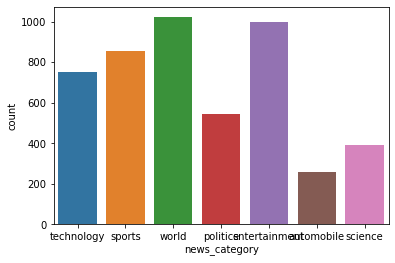

In [13]:
# countplot for balanced or imbalanced dataset checking
sns.countplot(df.news_category)

In [16]:
# checking for values in each target category
df['news_category'].value_counts()

world            1021
entertainment     998
sports            856
technology        751
politics          546
science           389
automobile        256
Name: news_category, dtype: int64

In [26]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0023ND744\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\0023ND744\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\0023ND744\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
# single function for removing stop words , tokenize,lemmatize
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

my_stopwords = ['make', 'like',  'news','new' ,'time', 'u','s','get', 'say']
def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_stopwords
  
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text)    
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [29]:
# joining 2 columns 

df['text'] = df['news_headline'] + " " + df['news_article']

In [30]:
df

,news_headline,news_article,news_category,text
0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology,50-year-old problem of biology solved by Artif...
1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology,Microsoft Teams to stop working on Internet Ex...
2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology,Hope US won't erect barriers to cooperation: C...
3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology,Global smartphone sales in Q3 falls 5.7% to 36...
4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology,EU hoping Biden will clarify US position on di...
...,...,...,...,...
4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",science,AstraZeneca to test combining Oxford vaccine w...
4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,science,"Humanity will face 60°C temperatures in 2050s,..."
4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,science,Human-made objects to outweigh living things b...
4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,science,"IUCN lists 31 species as 'Extinct', European B..."


In [31]:
# checking if cleaning function works

df.text[5]

'Parliamentary panel divided over key issues in Data Protection Bill: Report The members of the Joint Parliamentary Committee are divided over key issues in the Personal Data Protection Bill, 2019, such as the provision allowing government access to sensitive data of citizens without their consent and data localisation, ET reported. The panel, chaired by BJP MP Meenakashi Lekhi, has held consultations with stakeholders like Facebook, Twitter, Google, Ola, Uber and Paytm.'

In [32]:
clean_txt(df.text[5])

'parliamentary panel divide key issue data protection bill report members joint parliamentary committee divide key issue personal data protection bill provision allow government access sensitive data citizens without consent data localisation report panel chair bjp meenakashi lekhi hold consultations stakeholders facebook twitter google ola uber paytm'

In [35]:
df['clean_text'] = df['text'].apply(lambda x: clean_txt(x))

In [36]:
df

,news_headline,news_article,news_category,text,clean_text
0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology,50-year-old problem of biology solved by Artif...,year old problem biology solve artificial inte...
1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology,Microsoft Teams to stop working on Internet Ex...,microsoft team stop work internet explorer nov...
2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology,Hope US won't erect barriers to cooperation: C...,hope wont erect barriers cooperation china bla...
3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology,Global smartphone sales in Q3 falls 5.7% to 36...,global smartphone sales fall units gartner glo...
4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology,EU hoping Biden will clarify US position on di...,hop biden clarify position digital tax report ...
...,...,...,...,...,...
4812,AstraZeneca to test combining Oxford vaccine w...,"AstraZeneca, which is developing a coronavirus...",science,AstraZeneca to test combining Oxford vaccine w...,astrazeneca test combine oxford vaccine sputni...
4813,"Humanity will face 60°C temperatures in 2050s,...",As many as two billion people will face 60°C t...,science,"Humanity will face 60°C temperatures in 2050s,...",humanity face temperatures warn wef many two b...
4814,Human-made objects to outweigh living things b...,Scientists have said that the weight of human-...,science,Human-made objects to outweigh living things b...,human object outweigh live things end study sc...
4815,"IUCN lists 31 species as 'Extinct', European B...",The IUCN released an update of its Red List of...,science,"IUCN lists 31 species as 'Extinct', European B...",iucn list species extinct european bison see r...


In [37]:
# train test split

X, y = df['clean_text'], df['news_category']

In [38]:
X.shape

(4817,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
X_train.shape

(3371,)

In [41]:
X_test.shape

(1446,)

In [43]:
#Pipeline will take in models with certain parameters that we can then pass through a GridSearch to see which model and parameters give the best results.
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
#TfidfVectorizer is used on sentences, while TfidfTransformer is used on an existing count matrix, such as one returned by CountVectorizer.

In [ ]:
# TFIDF pipeline setup
#tvc_pipe = Pipeline([
 #(‘tvec’, TfidfVectorizer()),
 #(‘mb’, MultinomialNB())
#])

In [46]:
# pipleine for MultinomialNB

pipeline_LR = Pipeline([('tfidf', TfidfVectorizer()),
                ('model', MultinomialNB())])

# pipeline for Linear SVC

pipeline_SVM = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC())])

In [48]:
# fit the models 


pipeline_LR.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', MultinomialNB())])

In [49]:
pipeline_SVM.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [51]:
# Setting params for TFIDF Vectorizer gridsearch
tf_params = {
 'tfidf__max_features':[100, 2000],
 'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
 'tfidf__stop_words': [None, 'english']}

In [52]:
# setting up grdisearch

In [53]:
LR_gs = GridSearchCV(pipeline_LR, param_grid=tf_params, cv = 5, verbose =1, n_jobs = -1)

In [54]:
SVM_gs = GridSearchCV(pipeline_SVM, param_grid=tf_params, cv = 5, verbose =1, n_jobs = -1)

In [55]:
# now fit with grid search

LR_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tfidf__max_features': [100, 2000],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'tfidf__stop_words': [None, 'english']},
             verbose=1)

In [56]:
SVM_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', LinearSVC())]),
             n_jobs=-1,
             param_grid={'tfidf__max_features': [100, 2000],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'tfidf__stop_words': [None, 'english']},
             verbose=1)

In [57]:
# scoring the models

# Scoring Training data on NB
LR_gs.score(X_train, y_train)

0.9323642835953723

In [59]:
# Scoring Training data on SVM
SVM_gs.score(X_train, y_train)

0.9747849302877485

In [61]:
# Scoring Test data on NB
LR_gs.score(X_test, y_test)

0.8941908713692946

In [62]:
# Scoring Test data on SVM
SVM_gs.score(X_test, y_test)

0.9239280774550485

In [63]:
# putting it toghether

print('\nTrain and test scoring for NB')
print(LR_gs.score(X_train, y_train))
print(LR_gs.score(X_test, y_test))


print('\nTrain and test scoring for SVM')
print(SVM_gs.score(X_train, y_train))
print(SVM_gs.score(X_test, y_test))


Train and test scoring for NB
0.9323642835953723
0.8941908713692946

Train and test scoring for SVM
0.9747849302877485
0.9239280774550485
